# Shark Tank

_Shark Tank_ is a reality TV show. Contestants present their idea for a company to a panel of investors (a.k.a. "sharks"), who then decide whether or not to invest in that company.  The investors give a certain amount of money in exchange for a percentage stake in the company ("equity"). If you are not familiar with the show, you may want to watch part of an episode [here](https://www.youtube.com/watch?v=3VBmLGUDxWA) to get a sense of how it works.  You can also search for a clip on YouTube. 

The data that you will examine in this lab contains data about all contestants from the first 6 seasons of the show, including:
- the name and industry of the proposed company
- whether or not it was funded (i.e., the "Deal" column)
- which sharks chose to invest in the venture (N.B. There are 7 regular sharks, not including "Guest". Each shark has a column in the data set, labeled by their last name.)
- if funded, the amount of money the sharks put in and the percentage equity they got in return

To earn full credit on this lab, you should:
- use built-in `pandas` methods (like `.sum()` and `.max()`) instead of writing a for loop over a `DataFrame` or `Series`
- use the split-apply-combine pattern wherever possible

Of course, if you can't think of a vectorized solution, a `for` loop is still better than no solution at all!

In [ ]:
import pandas as pd

## Question 0. Getting and Cleaning the Data

The data is stored in the CSV file `sharktank.csv`. Read in the data into a Pandas `DataFrame`.

In [ ]:
# YOUR CODE HERE
dataFrame = pd.read_csv("sharktank.csv")

There is one column for each of the sharks. A 1 indicates that they chose to invest in that company, while a missing value indicates that they did not choose to invest in that company. Notice that these missing values show up as NaNs when we read in the data. Fill in these missing values with zeros. Other columns may also contain NaNs; be careful not to fill those columns with zeros, or you may end up with strange results down the line.

In [18]:
# YOUR CODE HERE
#Corcoran,Cuban,Greiner,Herjavec,John,O'Leary,Harrington

#dataFrame.iloc[9:15]
import pandas as pd

dataFrame = pd.read_csv("sharktank.csv")

dataFrame.Corcoran = dataFrame.Corcoran.fillna(0)
dataFrame.Cuban = dataFrame.Cuban.fillna(0)
dataFrame.Greiner = dataFrame.Greiner.fillna(0)
dataFrame.Herjavec = dataFrame.Herjavec.fillna(0)
dataFrame.John = dataFrame.John.fillna(0)
dataFrame["O'Leary"] = dataFrame["O'Leary"].fillna(0)
dataFrame.Harrington = dataFrame.Harrington.fillna(0)

#print(dataFrame.iloc[0,8:15])
#print(dataFrame.iloc[12,0])

Corcoran      1.0
Cuban         0.0
Greiner       0.0
Herjavec      0.0
John          0.0
O'Leary       0.0
Harrington    0.0
Name: 0, dtype: object
1.0


Notice that Amount and Equity are currently being treated as categorical variables (`dtype: object`). Can you figure out why this is? Clean up these columns and cast them to numeric types (i.e., a `dtype` of `int` or `float`) because we'll need to perform mathematical operations on these columns.

In [30]:
# YOUR CODE HERE
import pandas as pd

dataFrame = pd.read_csv("sharktank.csv")

dataFrame['Equity'] = dataFrame['Equity'].str.removesuffix('%')
dataFrame['Equity'] = dataFrame['Equity'].astype(float) / 100.0

dataFrame.Amount = dataFrame.Amount.fillna("0")
dataFrame.Amount = dataFrame.Amount.str.replace('"','')
dataFrame.Amount = dataFrame.Amount.str.replace(',','')
dataFrame.Amount = dataFrame.Amount.str.replace('$','')
dataFrame.Amount = dataFrame.Amount.astype(int)

#print(dataFrame.iloc[0,6:7])

Amount    50000
Name: 0, dtype: object


## Question 1. Which Company was Worth the Most?

The valuation of a company is how much it is worth. If someone invests \\$10,000 for a 40\% equity stake in the company, then this means the company must be valued at \$25,000, since 40% of \\$25,000 is \\$10,000.

Calculate the valuation of each company that was funded. Which company was most valuable? Is it the same as the company that received the largest total investment from the sharks?

In [3]:
# YOUR CODE HERE

import pandas as pd

dataFrame = pd.read_csv("sharktank.csv")

dataFrame['Equity'] = dataFrame['Equity'].str.removesuffix('%')
dataFrame['Equity'] = dataFrame['Equity'].astype(float) / 100.0

dataFrame.Amount = dataFrame.Amount.fillna("0")
dataFrame.Amount = dataFrame.Amount.str.replace('"','')
dataFrame.Amount = dataFrame.Amount.str.replace(',','')
dataFrame.Amount = dataFrame.Amount.str.replace('$','')
dataFrame.Amount = dataFrame.Amount.astype(int)

#removes entries in which equity is less than or equal to 0
dataFrame = dataFrame[ dataFrame['Equity'] > 0]
dataFrame.reset_index()

dataFrame['Valuation'] = dataFrame.Amount / dataFrame.Equity
print(dataFrame['Company'][dataFrame['Valuation'].idxmax()])
print(dataFrame['Valuation'][dataFrame['Valuation'].idxmax()])

Zipz
25000000.0


**Overall, Zipz is the most valuable company. Zips is not the company which received the most investments, but instead has the highest Investment / Equity ratio.**

## Question 2. Which Shark Invested the Most?

Calculate the total amount of money that each shark invested over the 6 seasons. Which shark invested the most total money over the 6 seasons?

_Hint:_ If $n$ sharks funded a given venture, then the amount that each shark invested is the total amount divided by $n$.

<Axes: >

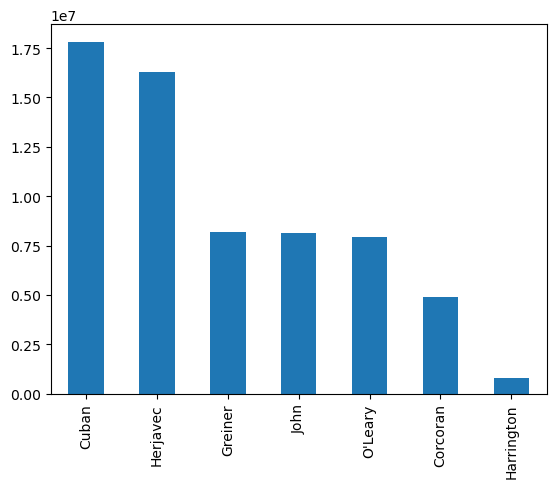

In [4]:
# ENTER CODE HERE.
import pandas as pd

dataFrame = pd.read_csv("sharktank.csv")

dataFrame['Equity'] = dataFrame['Equity'].str.removesuffix('%')
dataFrame['Equity'] = dataFrame['Equity'].astype(float) / 100.0

dataFrame.Amount = dataFrame.Amount.fillna("0")
dataFrame.Amount = dataFrame.Amount.str.replace('"','')
dataFrame.Amount = dataFrame.Amount.str.replace(',','')
dataFrame.Amount = dataFrame.Amount.str.replace('$','')
dataFrame.Amount = dataFrame.Amount.astype(int)

dataFrame['SplitAmount'] = dataFrame.Amount / dataFrame.loc[:, 'Corcoran':'Guest'].sum(axis=1)
#print(dataFrame[['Corcoran','Cuban','Greiner','Herjavec','John',"O'Leary",'Harrington']].sum())
dataFrame.Corcoran = dataFrame.loc[dataFrame.Corcoran == 1.0,'SplitAmount']
dataFrame.Cuban = dataFrame.loc[dataFrame.Cuban == 1.0,'SplitAmount']
dataFrame.Greiner = dataFrame.loc[dataFrame.Greiner == 1.0,'SplitAmount']
dataFrame.Herjavec = dataFrame.loc[dataFrame.Herjavec == 1.0,'SplitAmount']
dataFrame.John = dataFrame.loc[dataFrame.John == 1.0,'SplitAmount']
dataFrame["O'Leary"] = dataFrame.loc[dataFrame["O'Leary"] == 1.0,'SplitAmount']
dataFrame.Harrington = dataFrame.loc[dataFrame.Harrington == 1.0,'SplitAmount']

dataFrame.loc[:,'Corcoran':'Harrington'].sum().sort_values(ascending=False).plot.bar()

**As shown by the bar chart, Cuban is the shark with the highest amount of money invested.**

## Question 3. Do the Sharks Prefer Certain Industries?

Calculate the funding rate (the proportion of companies that were funded) for each industry. Make a visualization showing this information.

<Axes: ylabel='Equity'>

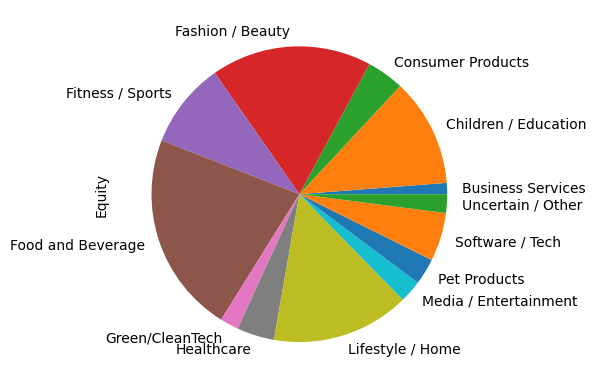

In [62]:
# ENTER CODE HERE.
import pandas as pd

dataFrame = pd.read_csv("sharktank.csv")


dataFrame.groupby('Industry')['Equity'].count().plot.pie()

**YOUR EXPLANATION HERE**

## Submission Instructions

Once you are finished, follow these steps:

1. Restart the kernel and re-run this notebook from beginning to end by going to `Kernel > Restart Kernel and Run All Cells`.

2. If this process stops halfway through, that means there was an error. Correct the error and repeat Step 1 until the notebook runs from beginning to end.

3. Double check that there is a number next to each code cell and that these numbers are in order.

Then, submit your lab as follows:

1. Go to `File > Export Notebook As > PDF`.

2. Double check that the entire notebook, from beginning to end, is in this PDF file. (If the notebook is cut off, try first exporting the notebook to HTML and printing to PDF.)

3. Upload the Notebook (ipynb) to canvas (one submission per group).

4. Demo your lab by next Tuesday for full credit.